In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats as stats

## For two continous variables

No handles with labels found to put in legend.
No handles with labels found to put in legend.
No handles with labels found to put in legend.
No handles with labels found to put in legend.
No handles with labels found to put in legend.


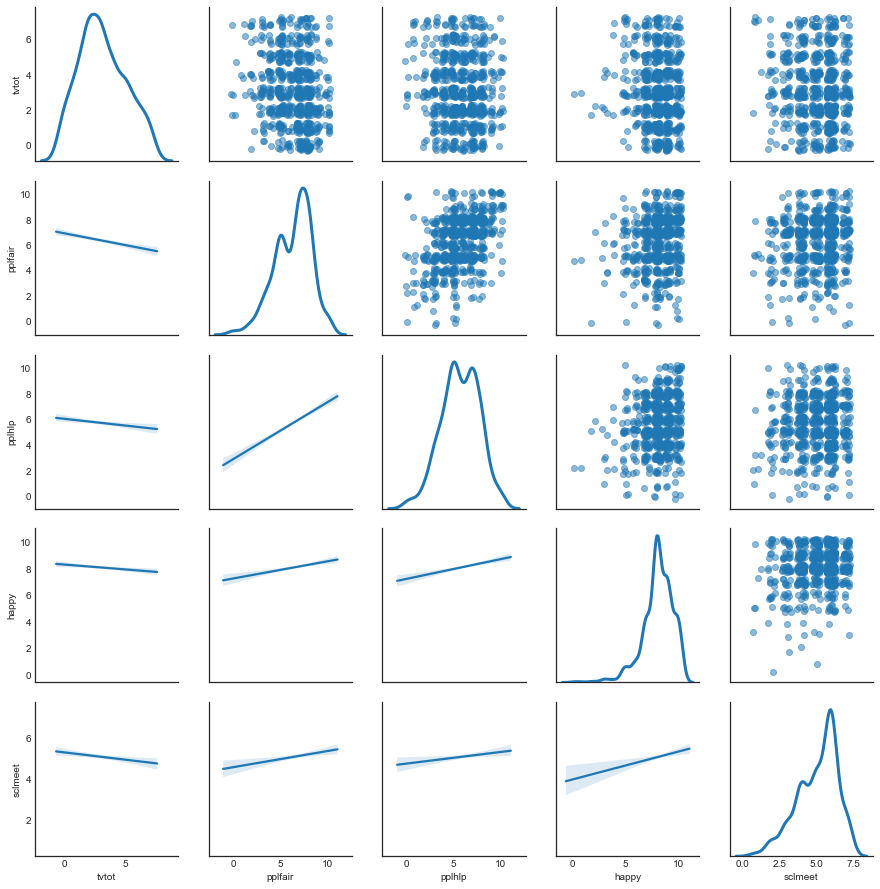

In [3]:
#make scatterplot matrix
sns.set_style('white')

df = pd.read_csv('https://raw.githubusercontent.com/Thinkful-Ed/data-201-resources/master/ESS_practice_data/ESSdata_Thinkful.csv')

#take a subset of the data to make plots clearer
df_czch = df.loc[
    ((df['cntry']=='CZ') | (df['cntry']=='CH')) & (df['year']==6),
    ['cntry', 'tvtot', 'pplfair', 'pplhlp', 'happy', 'sclmeet']
]

#because variables can only take integer values between 0 and 10, points on the plot will hide one another
#to better see all the points, create a dataframe of random noise (jitter) and add it only when plotting

#make a copy of the data to add jitter to and plot
df_jittered = df_czch.loc[:, 'tvtot':'sclmeet'].dropna()
#make random noise
jitter = pd.DataFrame(np.random.uniform(-.3,.3, size=(df_jittered.shape)),
                     columns=df_jittered.columns)

#combine the data and the noise
df_jittered = df_jittered.add(jitter)

#make a scatterplot matrix
g = sns.PairGrid(df_jittered.dropna(), diag_sharey=False)
#scatterplot
g.map_upper(plt.scatter, alpha=.5)
#fit line summarizing the linear relationship of the two variables
g.map_lower(sns.regplot, scatter_kws=dict(alpha=0))
#give information about the univariate distributions of the variables
g.map_diag(sns.kdeplot, lw=3)

plt.show()

            tvtot   pplfair    pplhlp     happy   sclmeet
tvtot    1.000000 -0.233280 -0.176517 -0.265293 -0.144105
pplfair -0.233280  1.000000  0.532927  0.275204  0.105886
pplhlp  -0.176517  0.532927  1.000000  0.269627  0.109383
happy   -0.265293  0.275204  0.269627  1.000000  0.244289
sclmeet -0.144105  0.105886  0.109383  0.244289  1.000000


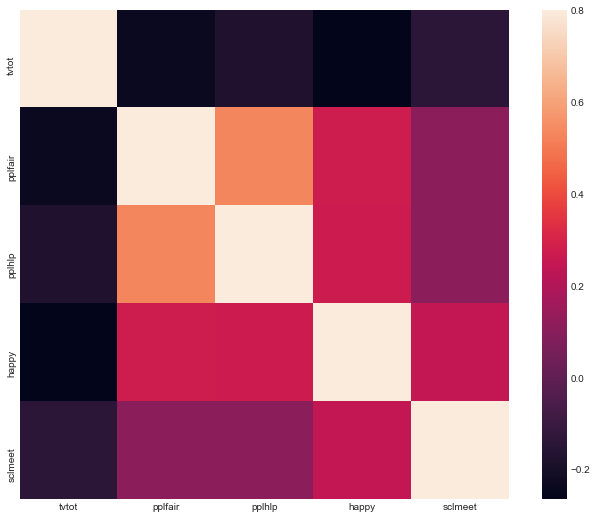

In [4]:
#make correlation matrix
corrmat = df_czch.corr()
print(corrmat)

#set up matplotlib figure
f, ax = plt.subplots(figsize=(12, 9))

#heatmap with seaborn
sns.heatmap(corrmat, vmax=.8, square=True)
plt.show()

## Continuous and a Categorical pair

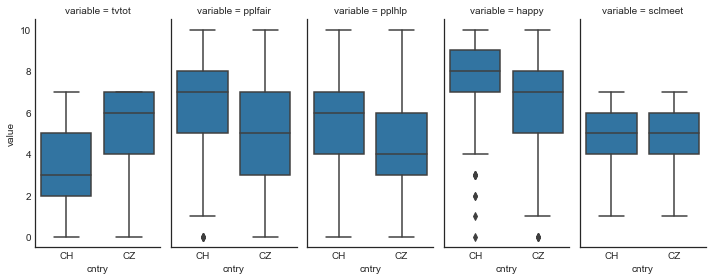

       happy                                               pplfair            \
       count      mean       std  min  25%  50%  75%   max   count      mean   
cntry                                                                          
CH     770.0  8.088312  1.437920  0.0  7.0  8.0  9.0  10.0   770.0  6.350649   
CZ     646.0  6.770898  2.053582  0.0  5.0  7.0  8.0  10.0   649.0  4.959938   

      ...  sclmeet       tvtot                                               
      ...      75%  max  count      mean       std  min  25%  50%  75%  max  
cntry ...                                                                    
CH    ...      6.0  7.0  772.0  3.141192  1.913706  0.0  2.0  3.0  5.0  7.0  
CZ    ...      6.0  7.0  653.0  5.142420  1.851775  0.0  4.0  6.0  7.0  7.0  

[2 rows x 40 columns]
tvtot
Ttest_indResult(statistic=19.962218108197227, pvalue=2.321576398582079e-78)
pplfair
Ttest_indResult(statistic=-12.444422221030575, pvalue=8.170685823736718e-34)
pplhlp
Ttest_indRes

In [5]:
#plot all the variables with boxplots for each country

#restructure the data so we can use facetgrid rather than making a boxplot for each variable separately
df_long = df_czch
df_long = pd.melt(df_long, id_vars=['cntry'])

g = sns.FacetGrid(df_long, col='variable', size=4, aspect=.5)
g = g.map(sns.boxplot, "cntry", "value", order=['CH', 'CZ'])
plt.show()

#descriptive statistics by group
print(df_czch.groupby('cntry').describe())

#test whether group differences are significant
for col in df_czch.loc[:, 'tvtot':'sclmeet'].columns:
    print(col)
    print(stats.ttest_ind(
        df_czch[df_czch['cntry']=='CZ'][col].dropna(),
        df_czch[df_czch['cntry']=='CH'][col].dropna()
    ))

## Two categorical variables

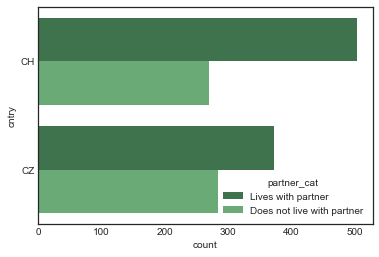

partner_cat  Does not live with partner  Lives with partner
cntry                                                      
CH                                  270                 503
CZ                                  284                 372
Power_divergenceResult(statistic=96.39958012596222, pvalue=9.236593586645439e-21)


In [6]:
#add a second categorical variable
df_2cat = df.loc[
    ((df['cntry']=='CZ') | (df['cntry']=='CH')) & (df['year']==6),
    ['cntry','partner']
]

#create a text variable so that output is easier to interpret
df_2cat['partner_cat'] = None
df_2cat.loc[df_2cat['partner']==1, 'partner_cat'] = 'Lives with partner'
df_2cat.loc[df_2cat['partner']==2, 'partner_cat'] = 'Does not live with partner'

#plot counts for each combination of levels
sns.countplot(y='cntry', hue='partner_cat', data=df_2cat, palette='Greens_d')
plt.show()

#table of counts
counttable = pd.crosstab(df_2cat['cntry'], df_2cat['partner_cat'])
print(counttable)

#test will return a chi-square test statistic and a p-value
#like the t-test, chi-square is compared against a distribution (the chi-square distribution)
#determines whether the group size differences are large enough to reflect differences in the population
print(stats.chisquare(counttable, axis=None))